Importing libraries and reading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import boxcox
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('https://raw.githubusercontent.com/TheSunnyBoy123/Win-Factor/main/week_1/customers_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Code for HISTOGRAM

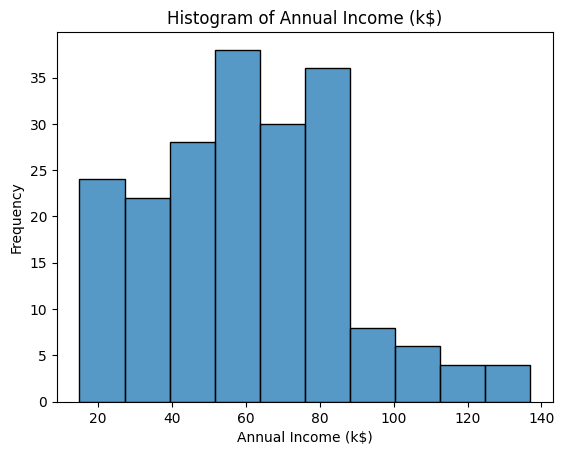

In [2]:
sns.histplot(data=df, x='Annual Income (k$)')
plt.title('Histogram of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

Code for Box plot

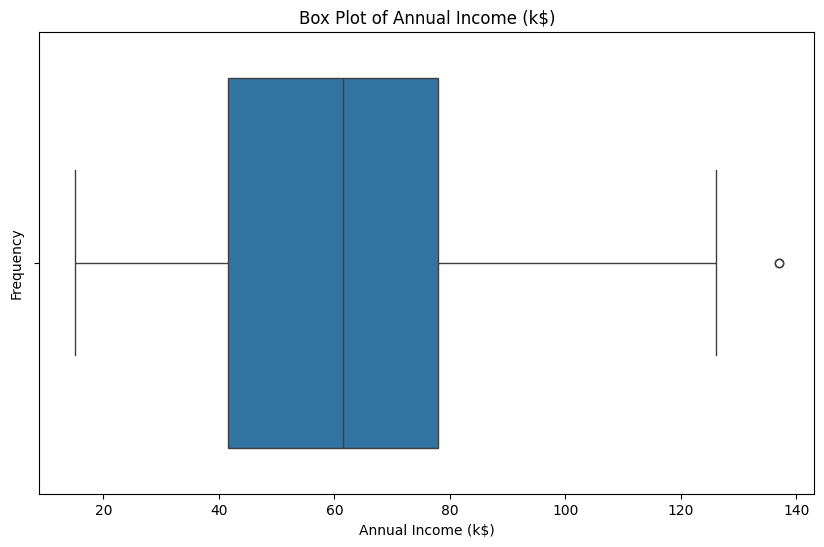

In [3]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Annual Income (k$)')
plt.title('Box Plot of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

Code for Scatter plot

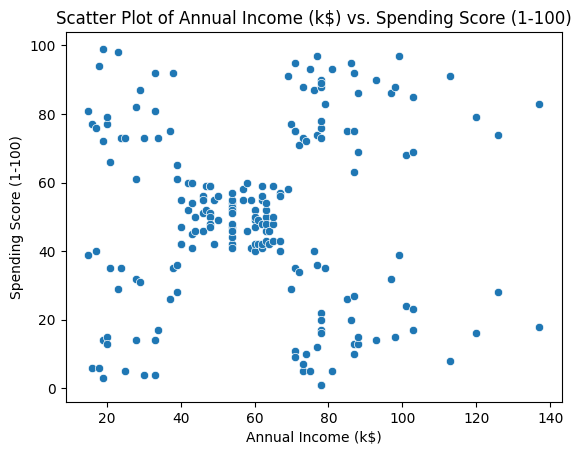

In [4]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income (k$) vs. Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Code for Pairpot

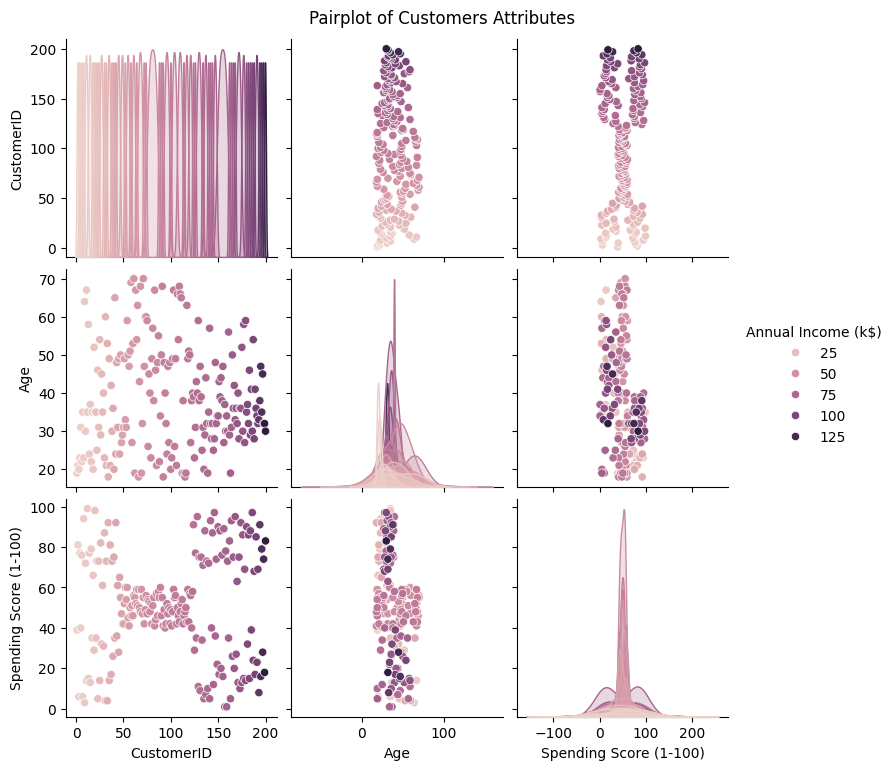

In [5]:
sns.pairplot(data=df, hue='Annual Income (k$)')
plt.suptitle('Pairplot of Customers Attributes', y=1.02)
plt.show()

Checking Datatypes of data

In [6]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


Selecting only numeric ones

In [7]:
numeric_df= df.select_dtypes(include=['number'])
numeric_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


Checking skewness

In [8]:
numeric_df.skew()

,0
CustomerID,0.000000
Age,0.485569
Annual Income (k$),0.321843
Spending Score (1-100),-0.047220


**HANDLING SKEWNESS of Duration**

Using Log Transformation

In [9]:
log_income= np.log(df['Annual Income (k$)'])
df['log_income']= log_income
print(df['Annual Income (k$)'].skew())
print(df['log_income'].skew())

0.3218425498619055
-0.7596281254451491


Using SquareRoot Transformation

In [12]:
sqrt_income= np.sqrt(df['Annual Income (k$)'])
df['sqrt_income']= sqrt_income
print(df['Annual Income (k$)'].skew())
print(df['sqrt_income'].skew())

0.3218425498619055
-0.23028952579486217


Using StandarScaler

-0.7596281254451491
-0.7596281254451472


Text(0.5, 1.0, 'Histogram of Sacled_log_income')

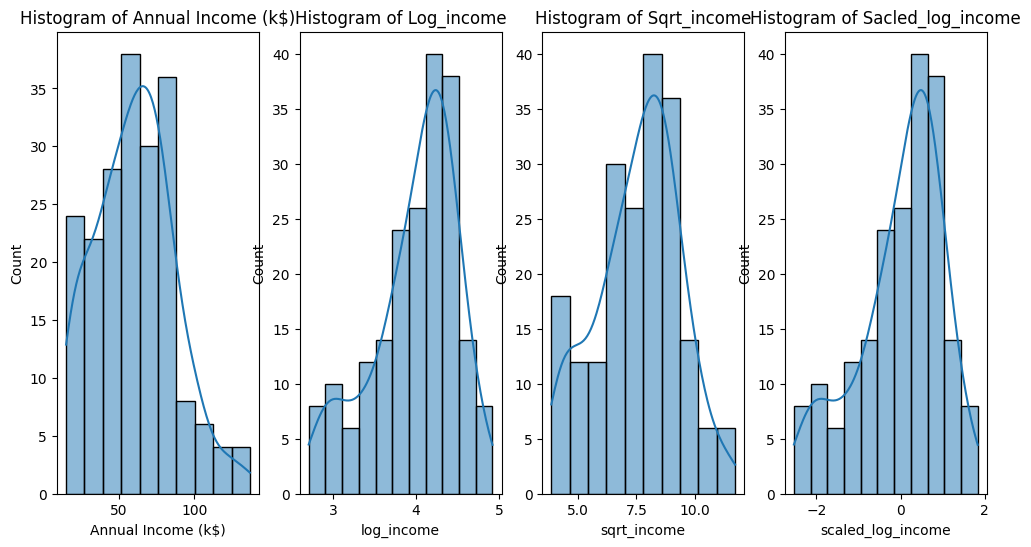

In [13]:
scaled_log_income= StandardScaler().fit_transform(log_income.values.reshape(-1,1))
df['scaled_log_income']= scaled_log_income
print(df['log_income'].skew())
print(df['scaled_log_income'].skew())
fig, [ax1,ax2,ax3,ax4] = plt.subplots(figsize=(12,6),ncols=4,nrows=1)
sns.histplot(data=df, x='Annual Income (k$)',ax=ax1,kde=True)
sns.histplot(data=df, x='log_income',ax=ax2,kde=True)
sns.histplot(data=df, x='scaled_log_income',ax=ax4,kde=True)
sns.histplot(data=df, x='sqrt_income',ax=ax3,kde=True)
ax1.set_title('Histogram of Annual Income (k$)')
ax2.set_title('Histogram of Log_income')
ax3.set_title('Histogram of Sqrt_income')
ax4.set_title('Histogram of Sacled_log_income')

**CLUSTERING**

By KMeans Clustering

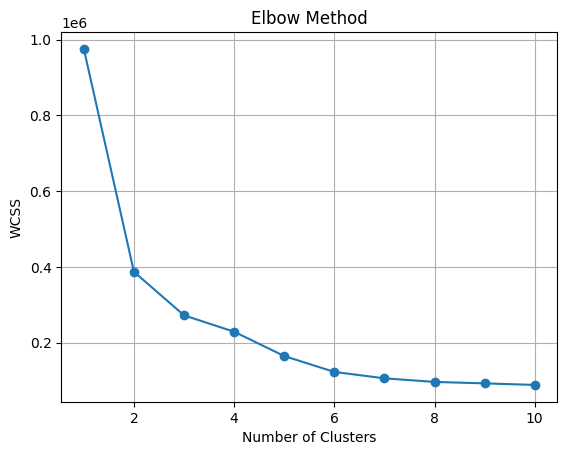

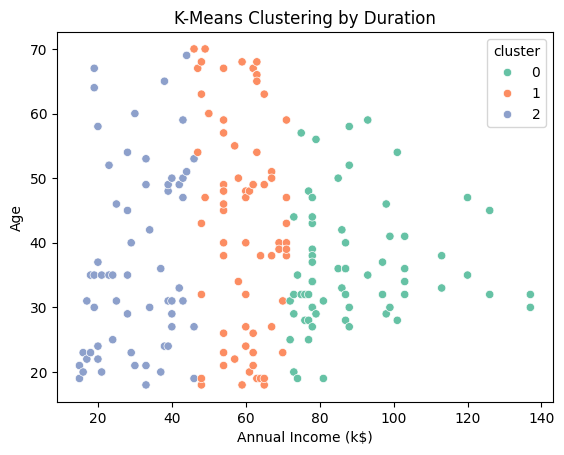

In [17]:
#Using Elbow method to find optimal K
X= numeric_df.values
wcss=[]  #within cluster sum of squares
for k in range(1,11):
  kmeans= KMeans(n_clusters=k,init='k-means++',random_state=0)
  kmeans.fit(numeric_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

# Apply KMeans with chosen K (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
sns.scatterplot(data=df, x='Annual Income (k$)',y='Age', hue='cluster', palette='Set2')
plt.title("K-Means Clustering by Duration")
plt.show()

Checking the centres of clusters

In [18]:
centres=  kmeans.cluster_centers_
print(centres)

[[166.5         36.04411765  88.91176471  50.20588235]
 [ 96.98591549  43.1971831   59.35211268  50.5915493 ]
 [ 31.01639344  36.91803279  30.36065574  49.73770492]]


**SUMMARY**

*   Skewness of Annual Income = 0.3218425498619055
*   Skewness after Log Transformation = -0.7596281254451491
*   Skewness after Sqrt Transformation = -0.23028952579486217
*   Clearly visible that skewness increased after applying log transformation because of very small skewness in raw data.







Clustering applied on Annual Income vs Age.


Observed shifting of the data such that mean=0 and standard deviation = 1 using Standard Scaler.